In [3]:
import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def display_img(imgs):
    plt.figure(figsize=(12, 10))
    t_len = len(imgs)
    for i, img in enumerate(imgs):
        plt.subplot(1, t_len, i+1)
        plt.imshow(img)
        # plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([])
    plt.show()

def load_img(image):
    bpath = './../image'
    path = os.path.join(bpath, image)
    img = cv.imread(path)
    if img is None:
        print('Image load failed!')
        sys.exit()
    return img

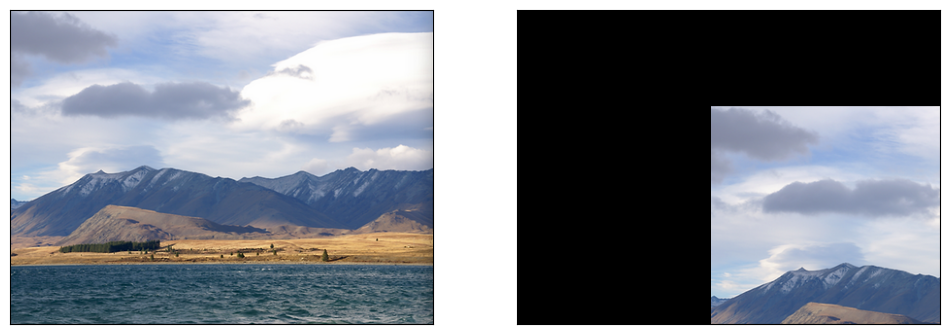

In [5]:
src = load_img('tekapo.bmp')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
aff = np.array([[1, 0, 200],
                [0, 1, 100]], dtype=np.float32)

dst = cv.warpAffine(src, aff, (0, 0,))

display_img([src, dst])

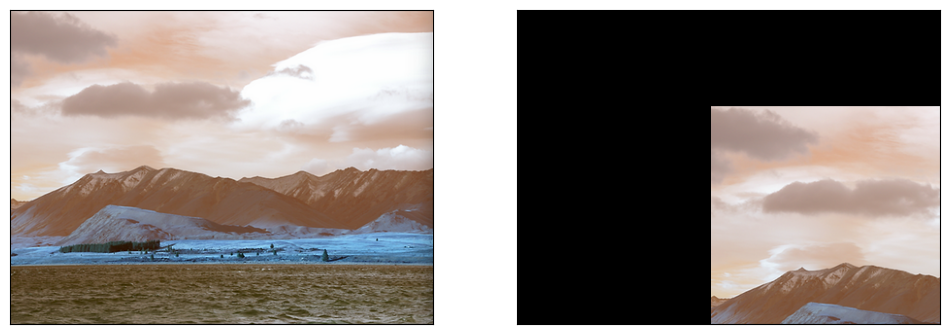

In [6]:
import sys 

src = cv.imread('./../image/tekapo.bmp')
if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0, 200],
                [0, 1, 100]], dtype=np.float32)

dst = cv.warpAffine(src, aff, (0, 0,))

display_img([src, dst])
# cv.imshow('src', src)
# cv.imshow('dst', dst)
# cv.waitKey()
# cv.destroyAllWindows()

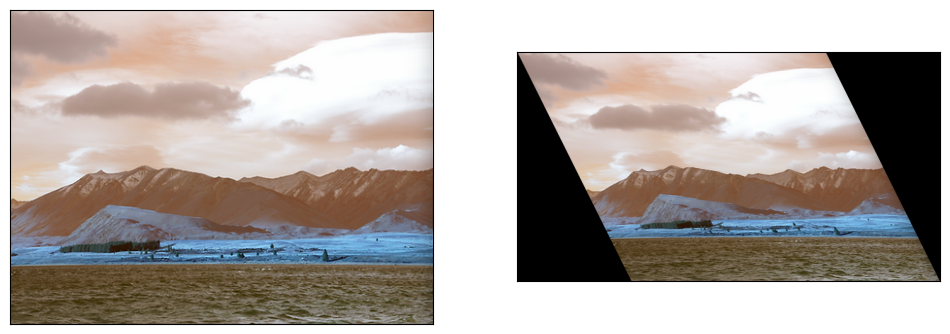

In [7]:
src = cv.imread('./../image/tekapo.bmp')
aff = np.array([[1, 0.5, 0],
                [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]

dst = cv.warpAffine(src, aff, (w+int(h*0.5), h))
display_img([src, dst])

# cv.imshow('src', src)
# cv.imshow('dst', dst)
# cv.waitKey()
# cv.destroyAllWindows()

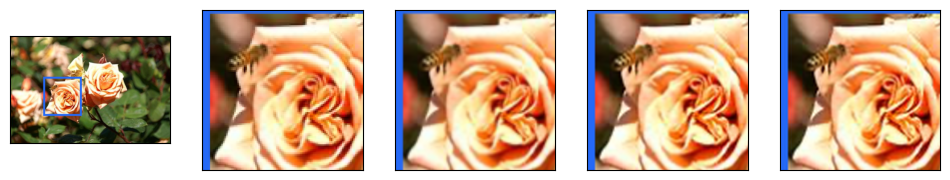

In [8]:
src = load_img('rose.bmp')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
dst1 = cv.resize(src, (0,0), fx=4, fy=4, interpolation=cv.INTER_NEAREST)
dst2 = cv.resize(src, (1920, 1280))
dst3 = cv.resize(src, (1920, 1280), interpolation=cv.INTER_CUBIC)
dst4 = cv.resize(src, (1920, 1280), interpolation=cv.INTER_LANCZOS4)

display_img([src, 
             dst1[500:900, 400:800], 
             dst2[500:900, 400:800], 
             dst3[500:900, 400:800], 
             dst4[500:900, 400:800]])

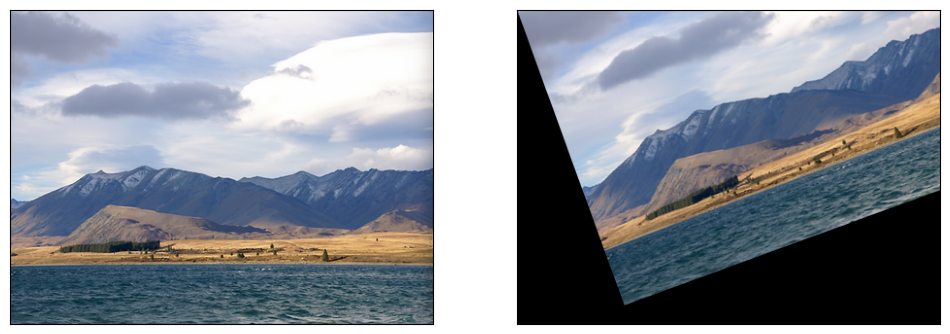

In [9]:
src = load_img('tekapo.bmp')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
rad = 20 * np.pi / 180
aff = np.array([[np.cos(rad), np.sin(rad), 0],
                [-np.sin(rad), np.cos(rad), 0]], dtype=np.float32)

dst = cv.warpAffine(src, aff, (0, 0))

display_img([src, dst])

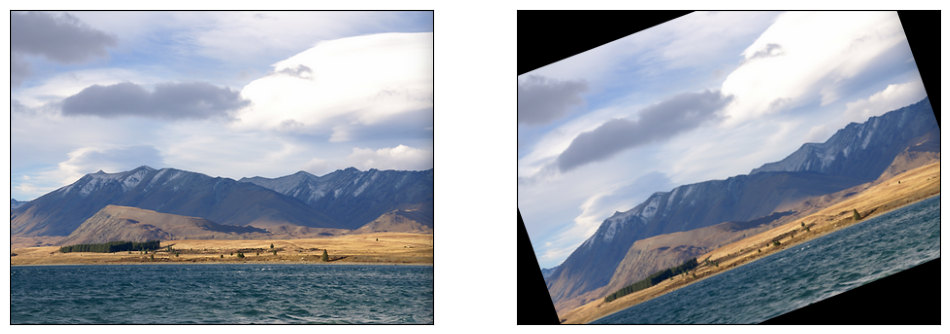

In [10]:
src = load_img('tekapo.bmp')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
cp = (src.shape[1]/2, src.shape[0]/2)
rot = cv.getRotationMatrix2D(cp, 20, 1)

dst = cv.warpAffine(src, rot, (0, 0))

display_img([src, dst])

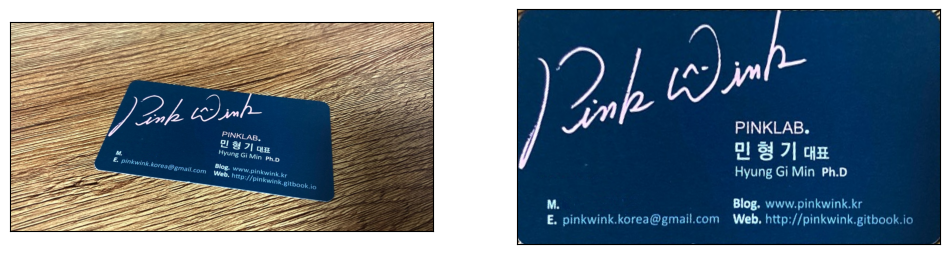

In [11]:
src = load_img('pinkwink_namecard.png')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
w, h = 720, 400
srcQuad = np.array([
    [645, 312 ],
    [1700, 432],
    [1720, 960],
    [445, 780],
    ]
                    , dtype=np.float32)
sdtQuad = np.array([[0, 0],
                    [w-1, 0],
                    [w-1, h-1],
                    [0, h-1]], dtype=np.float32)

pers = cv.getPerspectiveTransform(srcQuad, sdtQuad)
dst = cv.warpPerspective(src, pers, (w, h))

display_img([src, dst])

In [42]:
import sys
import numpy as np
import cv2 as cv

def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    radius = 5  # define the radius of the circle
    color = c1  # define the color of the circle
    thickness = 2  # define the thickness of the circle

    for pt in corners:
        cv.circle(cpy, tuple(pt), 25, c1, -1, cv.LINE_AA)
        # cv.circle(img, pt, radius, color, thickness)

    cv.line(cpy, tuple(corners[0]), tuple(corners[1]), c2, 2, cv.LINE_AA)
    cv.line(cpy, tuple(corners[1]), tuple(corners[2]), c2, 2, cv.LINE_AA)
    cv.line(cpy, tuple(corners[2]), tuple(corners[3]), c2, 2, cv.LINE_AA)
    cv.line(cpy, tuple(corners[3]), tuple(corners[0]), c2, 2, cv.LINE_AA)

    return cv.addWeighted(img, 0.3, cpy, 0.7, 0)

def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break
    if event == cv.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False
        
    if event == cv.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]
                srcQuad[i] += (dx, dy)
                cpy = drawROI(src, srcQuad)
                cv.imshow('img', cpy)
                ptOld = (x, y)
                break

src = load_img('scanned.jpg')
# src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
h,w=src.shape[:2]
dw = 500
dh = round(dw*297/210)

srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]] , dtype=np.int16)
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32)
dragSrc = [False, False, False, False]

disp = drawROI(src, srcQuad)
# cv.namedWindow('src')
cv.imshow('img', disp)
cv.setMouseCallback('img', onMouse)

while True:
    key = cv.waitKey()
    if key==13:
        cv.destroyAllWindows()
        break
    elif key==27:
        cv.destroyAllWindows()
        sys.exit()

pers = cv.getPerspectiveTransform(srcQuad.astype(np.float32), dstQuad)
dst = cv.warpPerspective(src, pers, (w, h), flags=cv.INTER_CUBIC)

# dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
cv.imshow('dst', dst)

while True:
    if cv.waitKey() == 27:
        break

cv.destroyAllWindows()